<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Univariate_Composition_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

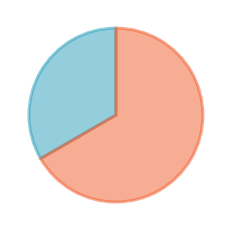

In [5]:
data =[15, 30]

plt.subplots()

wedges, texts = plt.pie(data,
                        startangle=90, 
                        colors=['#2a9fbc', '#f15b2a'],
                        wedgeprops={'linewidth':3, 'alpha':0.5})

colors=['#2a9fbc', '#f15b2a']
for i, w in enumerate(wedges):
  w.set_edgecolor(colors[i])

In [6]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.1 MB 1.4 MB/s 


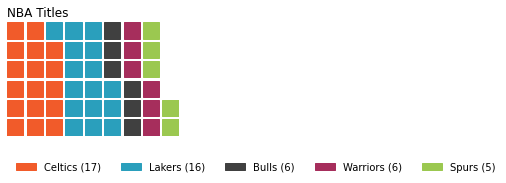

In [7]:
from pywaffle import Waffle
data = {'Celtics':17, 'Lakers':16, 'Bulls':6, 'Warriors':6, 'Spurs':5}

fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    values=data,
    colors=('#F15B2A','#2A9FBC','#404040','#A62E5C','#9BC850'),
    title={'label':'NBA Titles', 'loc':'left'},
    labels=["{0} ({1})".format(k,v) for k,v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor':(0, -0.4), 'ncol':len(data), 'framealpha':0})

In [8]:
data.items()

dict_items([('Celtics', 17), ('Lakers', 16), ('Bulls', 6), ('Warriors', 6), ('Spurs', 5)])

In [9]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.0, 100.0, 0.0, 100.0)

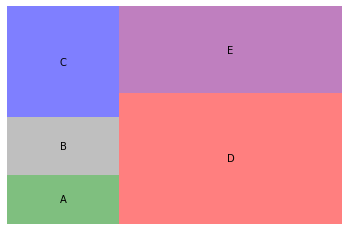

In [10]:
import squarify

data = [10, 12, 23, 54, 36]
labels = ['A', 'B', 'C', 'D', 'E']

squarify.plot(sizes=data,
              label=labels,
              color=['green', 'grey', 'blue', 'red', 'purple'],
              alpha=0.5)

plt.axis('off')

In [11]:
import pandas as pd

category = ['lottery', 'buy_house', 'credit', 'party', 'sell_car', 'taxes']
data = {'amount': [150000, -35000, -17500, -5000, 103000, -17000]}

df = pd.DataFrame(data=data, index=category)

df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


In [18]:
cumsum = df.amount.cumsum().shift(1).fillna(0)
# df.drop(columns='cumsum', inplace=True)

df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


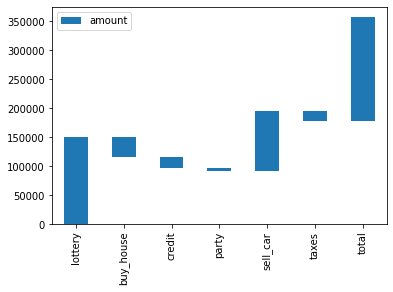

In [20]:
fig = df.plot(kind='bar',
              stacked=True,
              bottom=cumsum)

In [14]:
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines

0         0.0
0         0.0
0    150000.0
1    150000.0
1    150000.0
1    115000.0
2    115000.0
2    115000.0
2     97500.0
3     97500.0
3     97500.0
3     92500.0
4     92500.0
4     92500.0
4    195500.0
5    195500.0
5    195500.0
5         NaN
Name: amount, dtype: float64

In [15]:
h_lines[1::3] = np.nan
h_lines

0         0.0
0         NaN
0    150000.0
1    150000.0
1         NaN
1    115000.0
2    115000.0
2         NaN
2     97500.0
3     97500.0
3         NaN
3     92500.0
4     92500.0
4         NaN
4    195500.0
5    195500.0
5         NaN
5         NaN
Name: amount, dtype: float64

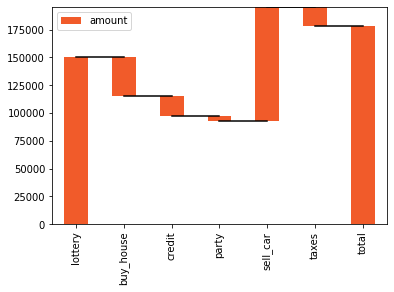

In [16]:
from pandas.core.resample import h
df.loc['total'] = df.sum().amount
cumsum.loc['total'] = 0

fig = df.plot(kind='bar',
              stacked=True,
              bottom=cumsum,
              color='#f15b2a')

cumsum.loc['total'] = df[:-1].sum().amount
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan

fig.plot(h_lines.index, h_lines.values, 'black')